<DIV ALIGN=CENTER>

# Introduction to Text Classification
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we introduce text classification. This is a
powerful, yet sometimes intimidating topic that finds applications in a
number of different areas: product reviews, sentiment analysis, and
document classification. Part of the challenge lies in the difficulty of
applying mathematical algorithms to (potentially very large) character
data sets. In Python, however, this challenge is considerably simplified
by using nltk and the scikit learn machine learning library.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

### Data

To get started with text classification, we will analyze the [twenty
newsgroup][tng] data set. We first download this data (scikit learn has
built in methods for doing this, however, we have cached a copy locally
on our server). The data are made available via a custom object, but we
can access the data of interest by using dictionary keys. Before delving
into text data mining, we first explore this data over several code
cells to understand more about the task at hand.

-----

[tng]: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html

In [2]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='train', shuffle=True, random_state=23)
test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='test', shuffle=True, random_state=23)

In [3]:
print("Number of Training Samples: {0}".format(len(train['data'])))
print("Number of Testing Samples: {0}".format(len(test['data'])))
print(40*'-')

for idx, label in enumerate(train['target_names']):
    print('Class {0:2d} = {1}'.format(idx, label))

Number of Training Samples: 11314
Number of Testing Samples: 7532
----------------------------------------
Class  0 = alt.atheism
Class  1 = comp.graphics
Class  2 = comp.os.ms-windows.misc
Class  3 = comp.sys.ibm.pc.hardware
Class  4 = comp.sys.mac.hardware
Class  5 = comp.windows.x
Class  6 = misc.forsale
Class  7 = rec.autos
Class  8 = rec.motorcycles
Class  9 = rec.sport.baseball
Class 10 = rec.sport.hockey
Class 11 = sci.crypt
Class 12 = sci.electronics
Class 13 = sci.med
Class 14 = sci.space
Class 15 = soc.religion.christian
Class 16 = talk.politics.guns
Class 17 = talk.politics.mideast
Class 18 = talk.politics.misc
Class 19 = talk.religion.misc


In [4]:
item_number = 250
print("Class Number = {0}".format(train['target'][item_number]))
print("Class Name = {0}".format(train['target_names'][train['target'][item_number]]))
print("-"*70)
print(train['data'][item_number])

Class Number = 3
Class Name = comp.sys.ibm.pc.hardware
----------------------------------------------------------------------
From: rnichols@cbnewsg.cb.att.com (robert.k.nichols)
Subject: Re: how to search for bad memory chips.
Organization: AT&T
Distribution: na
Lines: 29

In article <N5s42B8w165w@c-cat.UUCP> david@c-cat.UUCP (Dave) writes:
>i came upon this idea i would like to share with everyone.
>
>to check for bad memory chips
>
>1. create a boot disk with emm386 himem.sys and ramdrive.sys in the
>   config/autoexec.bat.
>
>2. boot the PC to create a RAM drive as large as possible.
>
>3. use a disk repair utility ( I use NDD ). Run it on the RAM
>        drive, yes it will run, its only a device driver
>
>4. run 1000 or so passes, they go very quick
>
>5. if your machine fails, there is a definate bad memory chip
>
>6. if your machine passes, there is a conflict with programs you
>        are loading in memory.
...

It's an interesting idea, but the worst-case data patterns devel

-----

## Classification

To this point, we have identified the features (or tokens in the
training documents) that we should use to classify our documents. But
this potential obscures the challenge of actually classifying documents.
Before introducing our first classification technique, examine one
document that is in our test data set. 

What typs of issues do you foresee in classifying documents like the one
shown?

-----

In [5]:
test_message = 100

print("Class Number = {0}".format(test['target'][test_message]))
print("Class Name = {0}".format(test['target_names'][test['target'][test_message]]))
print("-"*75)
print(test['data'][test_message])

Class Number = 6
Class Name = misc.forsale
---------------------------------------------------------------------------
From: jks2x@holmes.acc.Virginia.EDU (Jason K. Schechner)
Subject: Re: AN12 AIRCRAFT FOR SALE OR LEASING
Keywords: AIRCRAFT SALE
Organization: University of Virginia
Lines: 43

In article <AA9KerhuZ7@rtools.msk.su> slavik@rtools.msk.su writes:
>
>Our firm is in a position to either sell or lease  the serverses
>of one AN-12 air cargo transport aircraft  (with the complete
>technical repair in 1993 ).
>
>Terms of Delivery:
>
>1. The price of the aircraft is $840000.
>
>2. The price of leasing is $42800 per month with the guarantee
>    flight time more than 60 hours.
>
>    This price includes :
>        a) the price of the aircraft.
>        b) the price of insurance of the aircraft and the pilots.
>
>   The price of leasing does not include :
>        a) the fuel price.
>        b) the price of technical service.
>        c) taxes , airport taxes, air navigations expen

-----

### Naive Bayes Classifier

One of the (if not the) simplest techniques for perfomring text
classification is the [Naive Bayes classifier][nbd]. This technique is
popular, in part because of its simplicity, yet it also provides a quick
technique that can provide reasonable results. Fundamentally this method
applies Bayes theorem by (naively) assuming independence between the
features. In scikit learn, we will use a [Multinomial Naive Bayes][nbapi]
model, where we treat each feature independently. Thus we calculate the
likelihood of a feature corresponding to each training label, and the
accumulation of these likelihoods provides our overall classification.
By working with log-likelihoods, this accumulation becomes a simple sum.

-----

[nbd]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
[nbapi]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


cv = CountVectorizer()

train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

nb = MultinomialNB()

clf = nb.fit(train_counts, train['target'])
predicted = clf.predict(test_data)


print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB prediction accuracy =  77.3%


In [7]:
from sklearn.pipeline import Pipeline

tools = [('cv', CountVectorizer()), ('nb', MultinomialNB())]
clf = Pipeline(tools)

clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))

NB prediction accuracy =  77.3%


-----

We can also use the built-in `metrics` methods to display more
information about the classification results, including as a function of
the different labels.

-----

In [8]:
from sklearn import metrics
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med       0.87      0.82      0.85       396
         

-----

We can also visually display the confusion matrix (where we show how
documents were misclassifid) by using Seaborn to create a heatmap visual.
First we create our confusion matrix method, which we subsequently use to
display the results from our Naive Bayes model.

-----

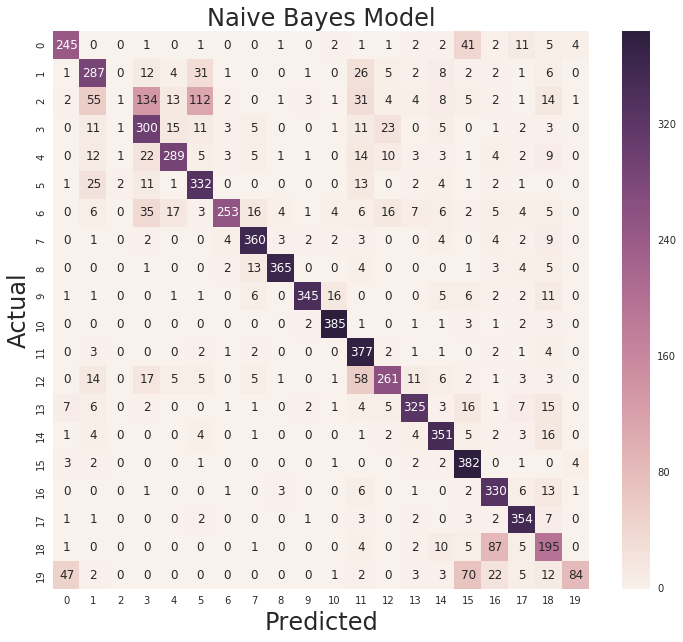

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

from helper_code import mlplots as mp
mp.confusion(test['target'], predicted, range(20), 20, 'Naive Bayes Model')

-----

## Student Activity

In the preceding cells, we used several outlier detection techniques to
identify manually added outliers to the Iris data. Now that you have run
the Notebook, go back and make the following changes to see how the
results change.

1. Change the number of outlier points added to the two _Sepal_
features, including noise points, transposed columns, and incorrect
measurements. How does this visually change the distribution? How does it
affect the statistical summarizations?
2. Change the parameters used in the DBSCAN algorithm. How does this
affect the outlier detection? How does bandwidth used in the KDE
estimator. How does this affect the resulting plot?
3. Try using a different kernel function, for example a `linear` or
`poly` with the `OneClassSVM`. How does this affect the outlier
detection process?

Finally, the previous cells only modified the _Sepal_ features, try
making four-dimensional fake data by creating fake _Petal_ features as
well. Can you still apply the demonstrated techniques to the four
dimensional data set.

-----

-----

### Stop Words

Text documents often contain many occurrences of the same word. For
example, in a document written in _English_, words such as _a_, _the_,
_of_, and _it_ likely occur very frequently. When classifying a document
based on the number of times specific words occur in the text document,
these words can lead to biases, especially since they are generally
common in **all** text documents you might want to classify. As a
result, the concept of [_stop words_][swd] was invented. Basically these
words are the most commonly occurring words that should be removed during
the tokenization process in order to improve subsequent classification
efforts. 

We can easily specify that the __English__ stop words should be
excluded during tokenization by using the `stop_words` parameter as
shown below. Note that with this simple change, our classification
accuracy has increased.

-----
[swd]: https://en.wikipedia.org/wiki/Stop_words

NB (with Stop Words) prediction accuracy =  80.2%


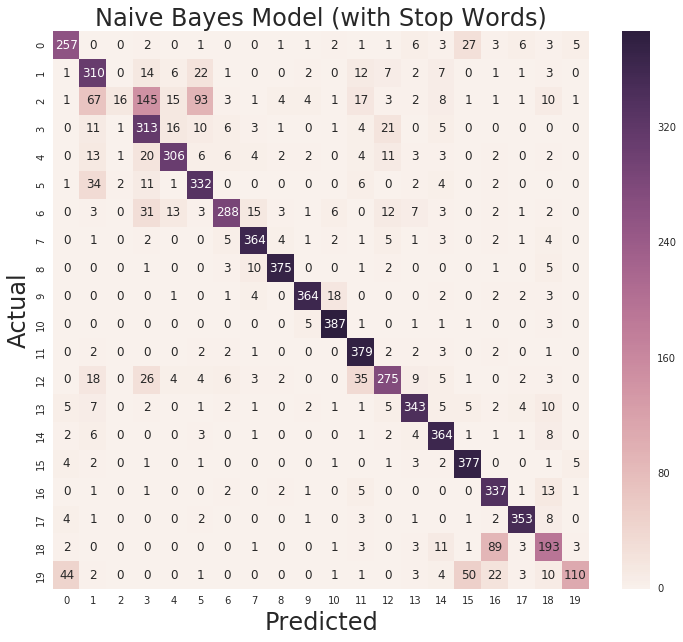

In [10]:
# Modify parameters in out Pipeline and rerun.
# In this case, we set stop words 
clf.set_params(cv__stop_words = 'english')

clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("NB (with Stop Words) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))

# Now plot confusion matrix
sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

mp.confusion(test['target'], predicted, range(20), 20, 'Naive Bayes Model (with Stop Words)')

-----

## Student Activity

In the preceding cells, we used PCA to transform the combined digit data
and to explore the distribution of the real data and outliers in
two-dimensional plots by using different PCA components. Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

1. Change the number of PCA components lower and higher. How does this
affect the separation of the outliers?
2. Change the PCA components used to make these plots, for example
to the third and fourth component. How does this affect the separation
of the outliers?
3. Try making a new fake data point that combines the 'bar' image from
the helper code with an existing number, such as a six. Using a
different color ini the plots for this data point, where does this new,
more realistic _fake_ data point lie in the previous plots?

Finally, try applying a classifier on the new digit data. Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did for the new _fake_ digits?

-----

-----
### Vectorizer Parameters

Explore other parameters to `CountVectorizer` or `TfidfVectorizer`:

- `lowercase=True`
- `max_features=10000`
- `min_df` and `max_df`
- `norm`
-----

In [11]:
# Lowercase and restrict ourselves to about half the available features
clf.set_params(cv__stop_words = 'english', cv__lowercase=True, cv__max_features=65000)

clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("NB (TF-IDF with Stop Words) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))

NB (TF-IDF with Stop Words) prediction accuracy =  80.5%


----

### TF IFD

Previously, we have simply used the number of times a token (i.e., word,
or more generally an n-gram) occurs in a document to classify the
document. Even with the removal of stop words, however, this can still
overemphasize tokens that might generally occur across many documents
(e.g., names or general concepts). An alternative technique that often
provides robust improvements in classification accuracy is to employ the
frequency of token occurrence, normalized over the frequency with which
the token occurs in all documents. In this manner, we give higher
weight in the classification process to tokens that are more strongly
tied to a particular label. 

Formally this concept is known as [term frequency–inverse document
frequency][tfd] (or tf-idf), and scikit-learn provides this
functionality via the [`TfidfTransformer`][tftd] that can either follow
a tokenizer, such as `CountVectorizer` or can be combined together into
a single transformer via the [`TfidfVectorizer`][tfvd]

-----
[tfd]: https://en.wikipedia.org/wiki/Tf–idf

[tftd]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

[tfvd]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tools = [('tf', TfidfVectorizer()), ('nb', MultinomialNB())]
clf = Pipeline(tools)
clf.set_params(tf__stop_words = 'english')

clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("NB (TF-IDF with Stop Words) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))

NB (TF-IDF with Stop Words) prediction accuracy =  81.7%


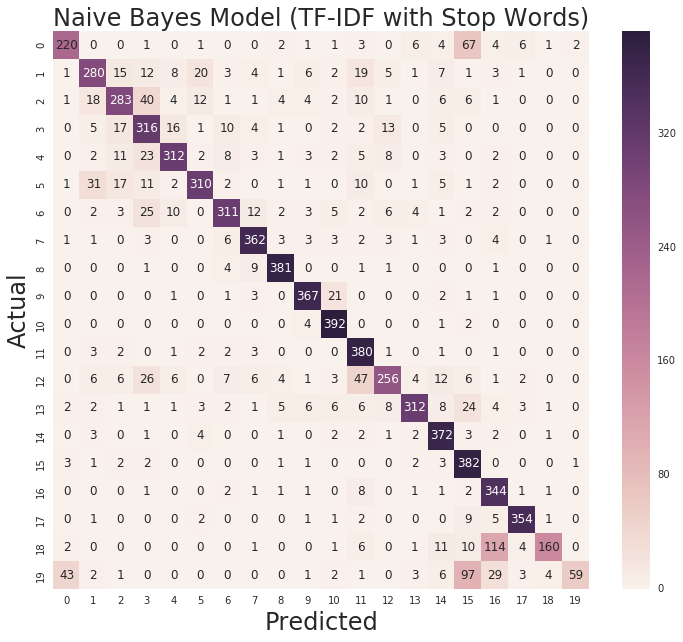

In [13]:
# Now plot confusion matrix
sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

mp.confusion(test['target'], predicted, range(20), 20, 'Naive Bayes Model (TF-IDF with Stop Words)')

-----

## Document Classification

We now look at more advanced classification techniques than the Naive
Bayes classification technique that we employed in the previous Notebook.

### Linear SVM Classifier

One of the simplest classification techniques to understand is [support
vector machine][svmd], or SVM. SVM attempts to divide data by finding
(hyper-)planes that optimally differentiate data between classes. For
our text data mining, we can employ linear SVM for classification, known
as linear SVC, to classify text documents by their token feature
vectors. scikit_learn implements this technique in the [`LinearSVC`][lsvc] class.

-----
[lsvc]: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

[svmd]: https://en.wikipedia.org/wiki/Support_vector_machine

In [14]:
from sklearn import svm

tools = [('tf', TfidfVectorizer()), ('svm', svm.LinearSVC())]
clf = Pipeline(tools)

clf.set_params(tf__stop_words = 'english')
clf.set_params(svm__C = 1000)

clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("SVM (TF-IDF with Stop Words) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))

SVM (TF-IDF with Stop Words) prediction accuracy =  83.4%


In [15]:
from sklearn import metrics

print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.76      0.80       319
           comp.graphics       0.76      0.78      0.77       389
 comp.os.ms-windows.misc       0.73      0.70      0.71       394
comp.sys.ibm.pc.hardware       0.65      0.72      0.68       392
   comp.sys.mac.hardware       0.80      0.82      0.81       385
          comp.windows.x       0.83      0.74      0.79       395
            misc.forsale       0.73      0.85      0.79       390
               rec.autos       0.90      0.88      0.89       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.90      0.93      0.92       397
        rec.sport.hockey       0.96      0.97      0.97       399
               sci.crypt       0.93      0.93      0.93       396
         sci.electronics       0.76      0.74      0.75       393
                 sci.med       0.91      0.85      0.88       396
         

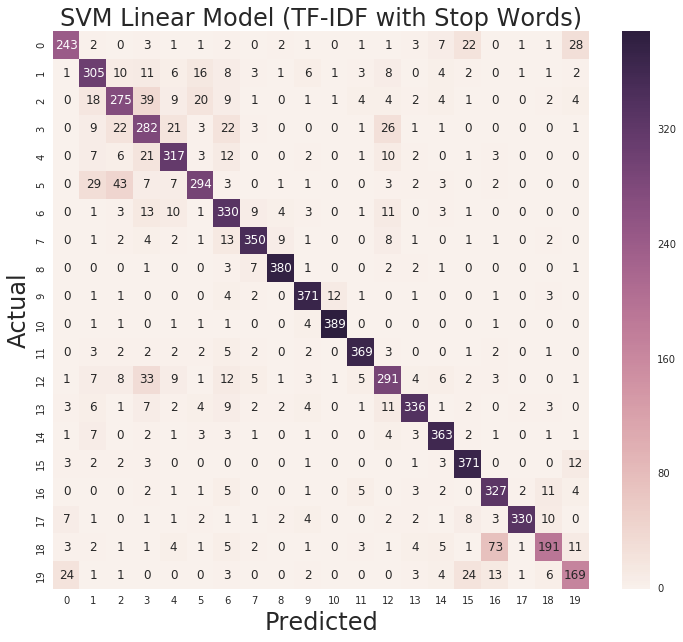

In [16]:
# Now plot confusion matrix
sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

mp.confusion(test['target'], predicted, range(20), 20, 'SVM Linear Model (TF-IDF with Stop Words)')

-----

### SVM with SGD

We can use a [modified linear SVM][sgd] classifier that employs stochastic gradient
descent to quantify the loss for each sample, which is used to update
the classification model. Note for best results, we want our data to
have zero mean and unit variance for this technique to optimally work.
Since out text dta do not have this, we should expect suboptimal results.

-----
[sgd]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [17]:
from sklearn.linear_model import SGDClassifier

tools = [('tf', TfidfVectorizer()), ('sgd', SGDClassifier())]
clf = Pipeline(tools)

clf.set_params(tf__stop_words = 'english')

clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("SGD (TF-IDF with Stop Words) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))

SGD (TF-IDF with Stop Words) prediction accuracy =  84.9%


In [18]:
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.75      0.78       319
           comp.graphics       0.77      0.78      0.78       389
 comp.os.ms-windows.misc       0.75      0.74      0.75       394
comp.sys.ibm.pc.hardware       0.72      0.75      0.74       392
   comp.sys.mac.hardware       0.85      0.84      0.84       385
          comp.windows.x       0.85      0.77      0.81       395
            misc.forsale       0.83      0.90      0.86       390
               rec.autos       0.91      0.90      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.89      0.95      0.92       397
        rec.sport.hockey       0.94      0.98      0.96       399
               sci.crypt       0.93      0.95      0.94       396
         sci.electronics       0.83      0.76      0.79       393
                 sci.med       0.88      0.88      0.88       396
         

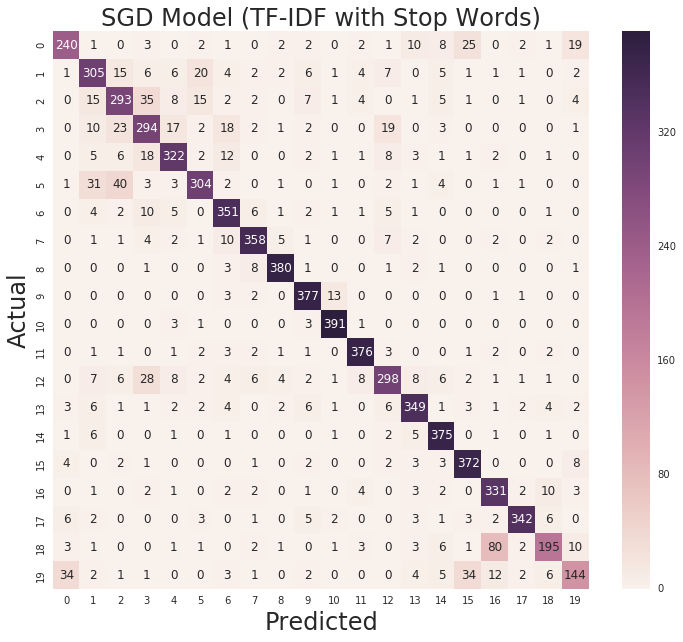

In [19]:
# Now plot confusion matrix
sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

mp.confusion(test['target'], predicted, range(20), 20, 'SGD Model (TF-IDF with Stop Words)')

----

### Logistic Regression

[Logistic Regression][lrd] is typically employed on categorical
variables, such as yes/no decision, or win/loss likelihoods. In the case
of many labels, we can use the trick that logistic regressin can
quantify the likelihood a vector is in or out of a particular category.
Thus, by computing this over all categories we can determine the best
label for each test vector. [scikit_learn][sllr] provides an
implementation that can be easily used for our classification problem

-----

[lrd]: https://en.wikipedia.org/wiki/Logistic_regression
[sllr]: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer

clf = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression(C=1000))])


clf = clf.fit(train['data'], train['target'])
predicted = clf.predict(test['data'])

print("LR (TF-IDF with Stop Words) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test['data'], test['target'])))


LR (TF-IDF with Stop Words) prediction accuracy =  84.9%


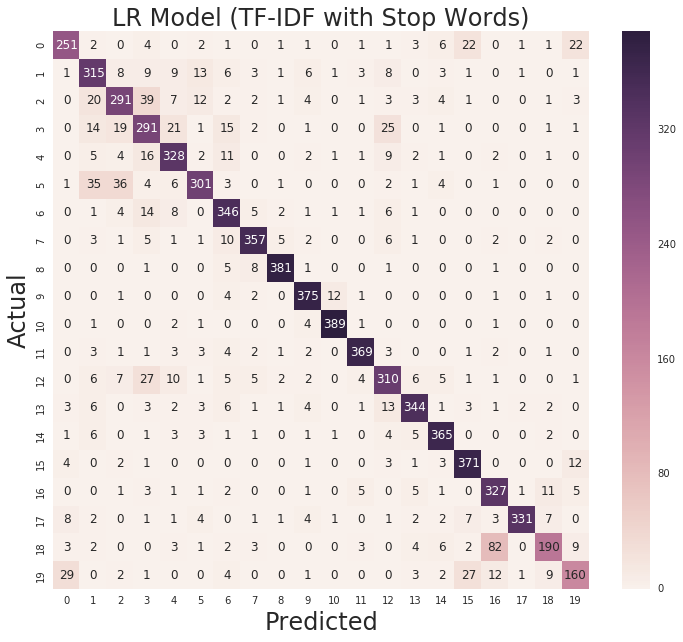

In [21]:
# Now plot confusion matrix
sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

mp.confusion(test['target'], predicted, range(20), 20, 'LR Model (TF-IDF with Stop Words)')

-----

## Student Activity

In the preceding cells, we used . Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

```python
# This code cell demonstrates using different penalty functions (e.g., lasso or ridge) 
# with Logistic Regression on our sample data.

clf = LogisticRegression(C = 1000, penalty='l1')
clf = LogisticRegression(C = 1000, penalty='l2')

clf.fit(train_counts, train['target'])

print("LR-1 prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))
print("LR-2 prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

predicted = clf.predict(test_data)
```

Use different penalty functions.
Change max featuees to limit number of features used to classify.

1. Change the number of PCA components lower and higher. How does this
affect the separation of the outliers?
2. Change the PCA components used to make these plots, for example
to the third and fourth component. How does this affect the separation
of the outliers?
3. Try making a new fake data point that combines the 'bar' image from
the helper code with an existing number, such as a six. Using a
different color ini the plots for this data point, where does this new,
more realistic _fake_ data point lie in the previous plots?

Finally, try applying a classifier on the new digit data. Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did for the new _fake_ digits?

-----

-----

## NLTK Example

Sentiment with Movie Reviews


-----

In [22]:
import nltk
mvr = nltk.corpus.movie_reviews

In [23]:
from sklearn.datasets import load_files

data_dir = '/home/data_scientist/nltk_data/corpora/movie_reviews'
mvr = load_files(data_dir, shuffle = False)
print('Number of Reviews: {0}'.format(len(mvr.data)))

Number of Reviews: 2000


In [24]:
from sklearn.cross_validation import train_test_split

mvr_train, mvr_test, y_train, y_test = train_test_split(
    mvr.data, mvr.target, test_size=0.25, random_state=23)

In [25]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

pipeline.fit(mvr_train, y_train)
y_pred = pipeline.predict(mvr_test)
print(metrics.classification_report(y_test, y_pred, target_names = mvr.target_names))

             precision    recall  f1-score   support

        neg       0.82      0.81      0.81       259
        pos       0.80      0.80      0.80       241

avg / total       0.81      0.81      0.81       500



In [27]:
top_count = 20
import numpy as np

nb = pipeline.steps[1][1]
cv = pipeline.steps[0][1]
features = cv.get_feature_names()

print('Label: Features')
print(75*'-')
for idx, target in enumerate(mvr.target_names):
    top_targets = np.argsort(nb.feature_log_prob_[idx])[-top_count:]
    top_features = " ".join(features[jdx] for jdx in top_targets)
    print('{0:5s}: {1}'.format(target, top_features))


Label: Features
---------------------------------------------------------------------------
neg  : be are movie on he his but film for this as with that it in is of to and the
pos  : one by are on but this he for film his with as that it in is to of and the


-----

## Student Activity

In the preceding cells, we used . Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

Use different penalty functions.
Change max featuees to limit number of features used to classify.

1. Change the classifier, number of features, use stop words, etc.

How does result change.

Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did ?

-----